# Des dates qui font des nombres premiers ?

Ce petit [notebook Jupyter](https://www.jupyter.org/), écrit en [Python](https://www.python.org/), a pour but de résoudre la question suivante :

> *"En 2017, combien de jours ont leur date qui est un nombre premier ?"*

Par exemple, `23022017` est premier, mais `24022017` ne l'est pas.
On veut trouver toutes les dates en 2017 qui sont des nombres premiers.

----
## 1. Il faut bien poser le problème
- *Q:* Qu'entends-on par *"date qui est un nombre premier"* ?
  - Ça dépend de l'écriture de la date, que ce soit `12012017` pour le 12 janvier ou `01122017`.
  - Dans le doute, la solution présentée ici sera adaptable aux deux cas.
- *Q:* Pourquoi se restreindre à 2017 ?
  - Parce que j'écris ce document en 2017...
  - Parce que c'est un nombre impair, et donc un nombre de la forme `12012017` a une chance d'être premier !
  - Mais dans le doute, la solution présentée ici sera adaptable à n'importe quelle année.

----
## 2. Une première solution, naïve
- On va d'abord écrire (ou importer) une fonction pour tester si un entier est premier,
- Puis on va écrire une fonction qui transforme une date en son nombre,
- Et enfin une boucle sur les 365 (ou 366) jours de l'année suffira à afficher les jours ayant une date première.

### 2.1. Tester la primalité, version tricheur
[`sympy`](http://www.sympy.org/) propose une fonction [`sympy.isprime`](http://docs.sympy.org/latest/modules/ntheory.html#sympy.ntheory.primetest.isprime).

In [1]:
from sympy import isprime

Elle marche très bien, et est très rapide !

In [2]:
[isprime(i) for i in [2, 3, 5, 7, 10, 11, 13, 17, 2017]]

[True, True, True, True, False, True, True, True, True]

Pour des nombres de 8 chiffres (c'est tout petit), elle est vraiment rapide :

In [3]:
from numpy.random import randint
%timeit sum([isprime(i) for i in randint(1e8, 1e9-1, 10**4)])

10 loops, best of 3: 142 ms per loop


$\implies$ $140 ~\text{ms}$ pour 10000 nombres à tester, ça me semble assez rapide pour ce qu'on veut en faire !

----
### 2.2. Transformer une date en nombre
On va utiliser le module [`datetime`](https://docs.python.org/3/library/datetime.html) de la bibliothèque standard :

In [4]:
from datetime import datetime

In [5]:
today = datetime.today()
YEAR = today.year
print("On va travailler avec l'année", YEAR, "!")

On va travailler avec l'année 2017 !


C'est ensuite facile de transformer une date en nombre, selon les deux formats.
On utilise [le formatage avec `.format()`](https://pyformat.info/#datetime) (en Python 3) :

In [6]:
def date_vers_nombre(date):
    return int("{:%d%m%Y}".format(date))

def date_vers_nombre_2(date):
    return int("{:%m%d%Y}".format(date))

In [10]:
date = datetime(YEAR, 1, 12)
print(date_vers_nombre(date))
print(date_vers_nombre_2(date))  # Le 0 initial est ignoré

12012017
1122017


### 2.3. Tester tous les jours de l'année

On peut partir du 1er janvier de cette année, et ajouter des jours un par un.
On utilise un itérateur (avec le mot clé `yield`), pour pouvoir facilement boucler sur tous les jours de l'année en cours :

In [29]:
from datetime import timedelta

def tous_les_jours(year=YEAR):
    date = datetime(year, 1, 1)
    un_jour = timedelta(days=1)
    for i in range(0, 366):
        yield date
        date += un_jour
        if date.year > year:  # On est allé trop loin
            raise StopIteration

On peut vérifier que ça donne ce qu'on voulait :

In [32]:
for date in tous_les_jours():
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} au format jour-mois-année et {:>8} au format mois-jour-année.".format(date, date_vers_nombre(date), date_vers_nombre_2(date)))

Le jour 01/01/2017 donne l'entier  1012017 au format jour-mois-année et  1012017 au format mois-jour-année.
Le jour 02/01/2017 donne l'entier  2012017 au format jour-mois-année et  1022017 au format mois-jour-année.
Le jour 03/01/2017 donne l'entier  3012017 au format jour-mois-année et  1032017 au format mois-jour-année.
Le jour 04/01/2017 donne l'entier  4012017 au format jour-mois-année et  1042017 au format mois-jour-année.
Le jour 05/01/2017 donne l'entier  5012017 au format jour-mois-année et  1052017 au format mois-jour-année.
Le jour 06/01/2017 donne l'entier  6012017 au format jour-mois-année et  1062017 au format mois-jour-année.
Le jour 07/01/2017 donne l'entier  7012017 au format jour-mois-année et  1072017 au format mois-jour-année.
Le jour 08/01/2017 donne l'entier  8012017 au format jour-mois-année et  1082017 au format mois-jour-année.
Le jour 09/01/2017 donne l'entier  9012017 au format jour-mois-année et  1092017 au format mois-jour-année.
Le jour 10/01/2017 donne l'e

Maintenant, il suffit de boucler, de tester si l'entier est premier, et de n'afficher que ceux qui le sont :

In [20]:
def date_premieres(conversion=date_vers_nombre, year=YEAR):
    for date in tous_les_jours(year):
        if isprime(conversion(date)):
            yield date

On peut aussi facilement trouver la prochaine date qui sera première :

In [151]:
def prochaine_date_premiere(date=datetime.today(), conversion=date_vers_nombre):
    year = date.year
    un_jour = timedelta(days=1)
    for i in range(0, 366):
        if isprime(conversion(date)):
            return date
        date += un_jour
        if date.year > year:  # On est allé trop loin
            return None
    return None

In [158]:
date = datetime.today()
prochain = prochaine_date_premiere(date)
print("Pour le jour d'aujourd'hui ({:%x}), le prochain jour ayant une date première dans l'année {} est : {:%x} !".format(date, date.year, prochain))

Pour le jour d'aujourd'hui (02/24/17), le prochain jour ayant une date première dans l'année 2017 est : 03/06/17 !


#### Pour les dates écrites "jour mois année" :

In [33]:
for date in date_premieres(date_vers_nombre):
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} qui est premier !".format(date, date_vers_nombre(date)))

Le jour 03/01/2017 donne l'entier  3012017 qui est premier !
Le jour 11/01/2017 donne l'entier 11012017 qui est premier !
Le jour 12/01/2017 donne l'entier 12012017 qui est premier !
Le jour 18/01/2017 donne l'entier 18012017 qui est premier !
Le jour 27/01/2017 donne l'entier 27012017 qui est premier !
Le jour 29/01/2017 donne l'entier 29012017 qui est premier !
Le jour 01/02/2017 donne l'entier  1022017 qui est premier !
Le jour 02/02/2017 donne l'entier  2022017 qui est premier !
Le jour 04/02/2017 donne l'entier  4022017 qui est premier !
Le jour 08/02/2017 donne l'entier  8022017 qui est premier !
Le jour 10/02/2017 donne l'entier 10022017 qui est premier !
Le jour 17/02/2017 donne l'entier 17022017 qui est premier !
Le jour 20/02/2017 donne l'entier 20022017 qui est premier !
Le jour 23/02/2017 donne l'entier 23022017 qui est premier !
Le jour 06/03/2017 donne l'entier  6032017 qui est premier !
Le jour 09/03/2017 donne l'entier  9032017 qui est premier !
Le jour 10/03/2017 donne

#### Pour les dates écrites "mois jour année" :

In [34]:
for date in date_premieres(date_vers_nombre_2):
    print("Le jour {:%d/%m/%Y} donne l'entier {:>8} qui est premier !".format(date, date_vers_nombre_2(date)))

Le jour 02/01/2017 donne l'entier  1022017 qui est premier !
Le jour 08/01/2017 donne l'entier  1082017 qui est premier !
Le jour 11/01/2017 donne l'entier  1112017 qui est premier !
Le jour 14/01/2017 donne l'entier  1142017 qui est premier !
Le jour 20/01/2017 donne l'entier  1202017 qui est premier !
Le jour 21/01/2017 donne l'entier  1212017 qui est premier !
Le jour 26/01/2017 donne l'entier  1262017 qui est premier !
Le jour 30/01/2017 donne l'entier  1302017 qui est premier !
Le jour 02/02/2017 donne l'entier  2022017 qui est premier !
Le jour 04/02/2017 donne l'entier  2042017 qui est premier !
Le jour 11/02/2017 donne l'entier  2112017 qui est premier !
Le jour 19/02/2017 donne l'entier  2192017 qui est premier !
Le jour 23/02/2017 donne l'entier  2232017 qui est premier !
Le jour 25/02/2017 donne l'entier  2252017 qui est premier !
Le jour 26/02/2017 donne l'entier  2262017 qui est premier !
Le jour 28/02/2017 donne l'entier  2282017 qui est premier !
Le jour 01/03/2017 donne

#### Comparaison
Il y a 71 jours, en 2017, qui ont une date première si on les écrit "jour mois année", et 69 si on les écrits "mois jour année".

In [35]:
len(list(date_premieres(date_vers_nombre)))

71

In [36]:
len(list(date_premieres(date_vers_nombre_2)))

69

----
## 3. Résolvons le problème pour toutes les années entre 0 AC et 2500 AC

On aimerait afficher une courbe montrant l'évolution du nombre de dates premières au cours des années, selon les deux formats.

In [111]:
def nombres_dates_premieres(year=YEAR):
    if year % 2 == 0:
        return [0, 0]
    else:
        return [len(list(date_premieres(date_vers_nombre, year=year))), len(list(date_premieres(date_vers_nombre_2, year=year)))]

In [112]:
nombres_dates_premieres()

[71, 69]

On vérifie que pour les années paires il n'y a pas de dates premières :

In [113]:
len(list(date_premieres(date_vers_nombre, year=2016)))

0

On peut donc récupérer toutes ces nombres, jusqu'à l'année 3000.
(On pourrait gagner du temps en ne considérant que les années impaires, et l'année 1)

In [114]:
import numpy as np

def intervale_nombres_dates_premieres(year1=1, year2=3000):
    nombres = np.zeros((year2 - year1 + 1, 2))
    for i, year in enumerate(range(year1, year2 + 1)):
        nombres[i, :] = nombres_dates_premieres(year)
    return nombres

On essaie sur un intervale de 11 ans :

In [115]:
%%time
nombres = intervale_nombres_dates_premieres(year1=2010, year2=2020)
print(nombres)

[[  0.   0.]
 [ 46.  50.]
 [  0.   0.]
 [ 52.  51.]
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]
 [ 71.  69.]
 [  0.   0.]
 [ 50.  58.]
 [  0.   0.]]
CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 176 ms


In [117]:
%%time
nombres = intervale_nombres_dates_premieres(year1=1, year2=3000)
print(nombres)

[[ 108.  108.]
 [   0.    0.]
 [  98.  104.]
 ..., 
 [   0.    0.]
 [  64.   55.]
 [   0.    0.]]
CPU times: user 50.2 s, sys: 36 ms, total: 50.2 s
Wall time: 52.6 s


In [118]:
np.shape(nombres)

(3000, 2)

Quelques statistiques :

In [119]:
print("- Au format jour-mois-année, il y a en moyenne {:.3g} jours premiers par an.".format(np.mean(nombres[:, 0])))
print("- Et en moyenne {:.3g} jours premiers par an, en enlevant les années paires.".format(np.mean(nombres[:, 0][nombres[:, 0] > 0])))

print("- Au format mois-jour-année, il y a en moyenne {:.3g} jours premiers par an.".format(np.mean(nombres[:, 1])))
print("- Et en moyenne {:.3g} jours premiers par an, en enlevant les années paires.".format(np.mean(nombres[:, 1][nombres[:, 1] > 0])))

- Au format jour-mois-année, il y a en moyenne 23.9 jours premiers par an.
- Et en moyenne 59.7 jours premiers par an, en enlevant les années paires.
- Au format mois-jour-année, il y a en moyenne 25.2 jours premiers par an.
- Et en moyenne 63 jours premiers par an, en enlevant les années paires.


On va afficher tout ça :

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

In [127]:
def affiche_nombres_dates_premieres(nombres):
    plt.figure()
    plt.plot(nombres[:, 0], '+', label="Format jour-mois-année")
    plt.plot(nombres[:, 1], '*', label="Format mois-jour-année")
    plt.title("Nombres de dates premières par an")
    plt.legend(loc='best', numpoints=1, fancybox=True, shadow=True, framealpha=0.8)
    plt.xlabel("Année")
    plt.ylabel("Nombre de dates premières")

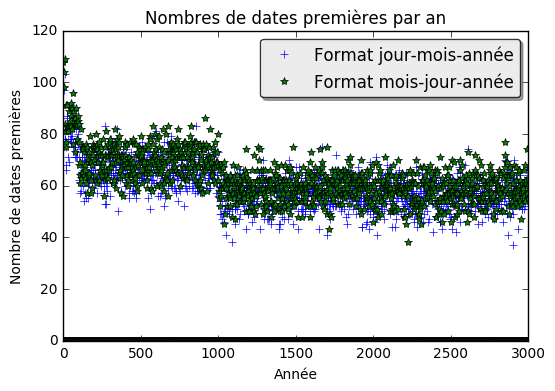

In [128]:
affiche_nombres_dates_premieres(nombres)

Avec un histogramme :

In [145]:
def hist_nombres_dates_premieres(nombres, ind=0):
    nbs = nombres[:, ind]
    nbs = nbs[nbs > 0]
    plt.figure()
    plt.hist(nbs, bins=100, label="Format %s-année" % ('jour-mois' if ind==0 else 'mois-jour'), color='bg'[ind])
    plt.title("Répartition du nombres de dates premières par an")
    plt.legend(loc='best', numpoints=1, fancybox=True, shadow=True, framealpha=0.8)
    plt.xlabel("Nombres de dates premières")
    plt.ylabel("Nombres")

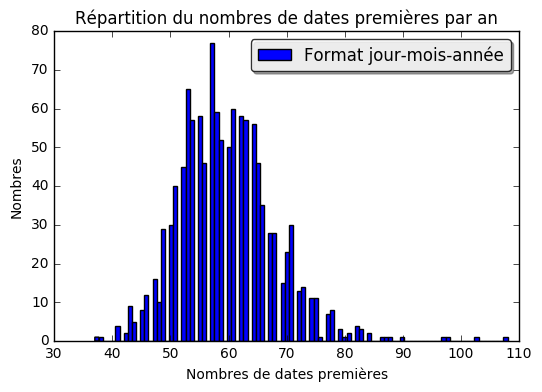

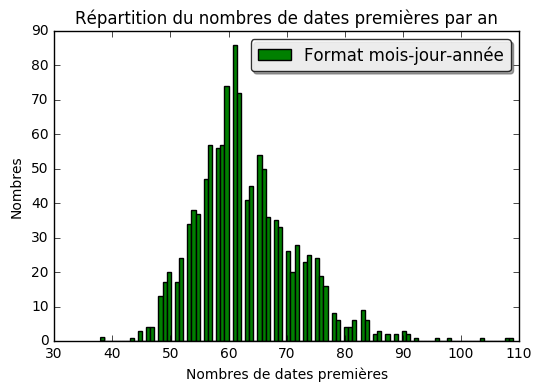

In [146]:
hist_nombres_dates_premieres(nombres, 0)
hist_nombres_dates_premieres(nombres, 1)

----
## Conclusion
- Pour les années impaires, il y a en moyenne une soixantaine de jours qui ont une date première !
- Le nombre est quasiment identique selon les deux formats, `jour-mois` ou `mois-jour`.

Ce n'était pas très dur à calculer, mais intéressant.

> C'est tout pour aujourd'hui les amis, [allez voir d'autres notebooks si vous êtes curieux !](https://github.com/Naereen/notebooks/).

> [See this repository for other Python notebook doing numerical simulations](https://github.com/Naereen/notebooks/tree/master/simus/).